# Exercise 4: Linear Regression


Problem 1 : Predicting SalePrice using GrLivArea
Download the Kaggle dataset “train.csv” from NTU Learn, posted corresponding to this Example Class.
Extract the following Numeric variables from the dataset, and store as two new Pandas DataFrames.

houseGrLivArea = pd.DataFrame(houseData['GrLivArea']) Above ground living area in SqFt

houseSalePrice = pd.DataFrame(houseData['SalePrice']) Sale Price of house in US Dollars


In [9]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [10]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
houseGrLivArea = pd.DataFrame(houseData['GrLivArea']) 
houseGrLivArea.head()

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198


In [12]:
houseSalePrice = pd.DataFrame(houseData['SalePrice']) 
houseSalePrice.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


a) Plot houseSalePrice against houseGrLivArea using standard jointplot, and note the strong linear relationship.
Remember the correlation coefficient between these two variables from the last Example Class? Check again.

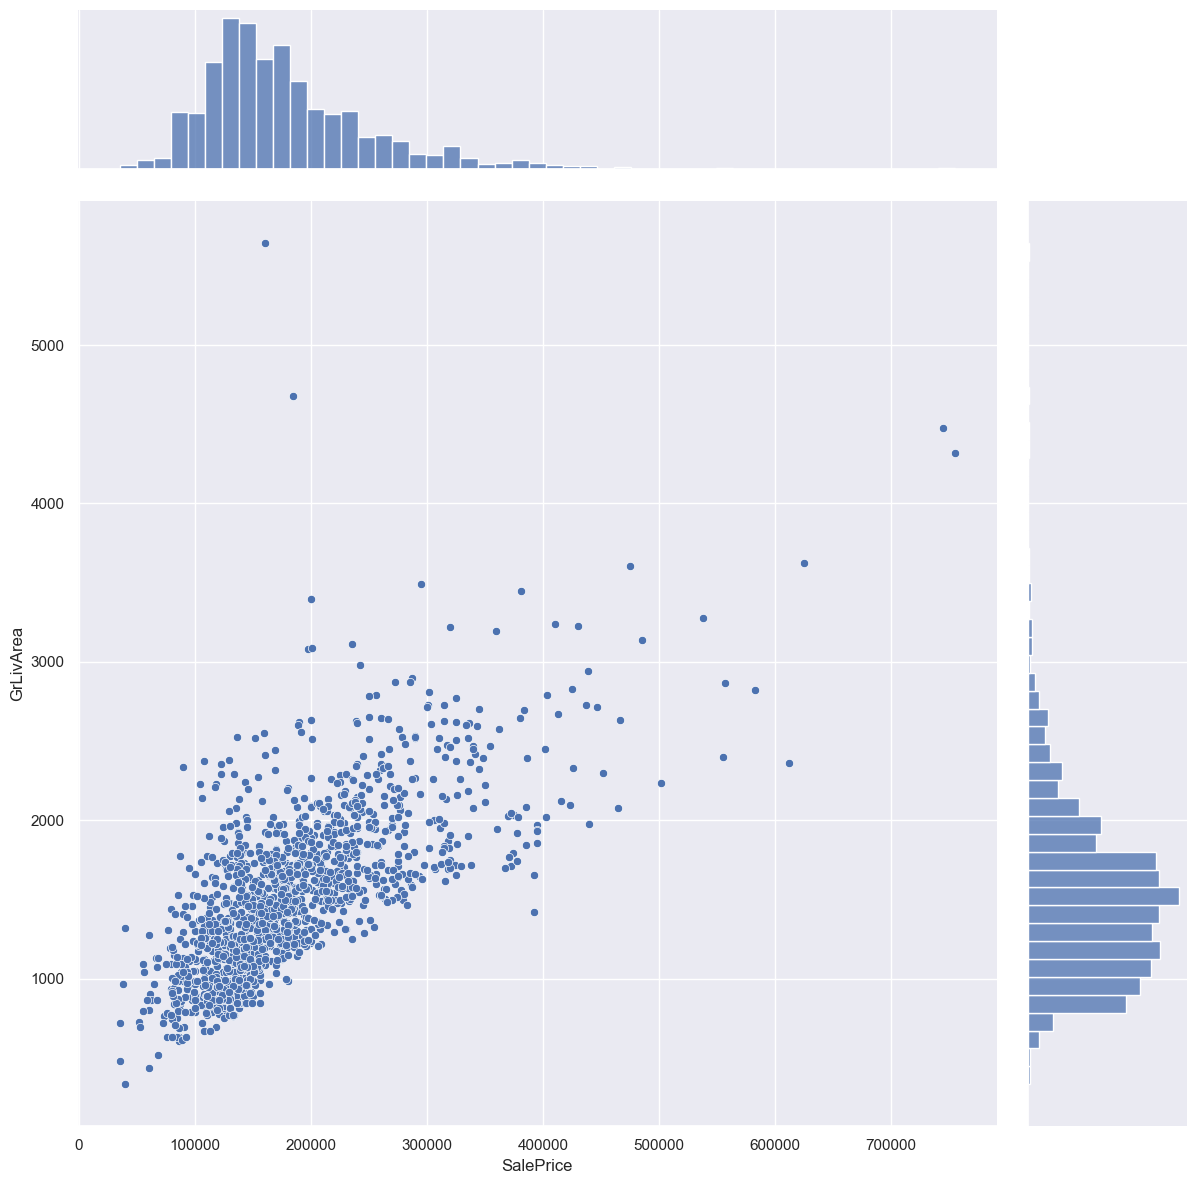

In [13]:
# Create a joint dataframe by concatenating the two variables
houseDF = pd.concat([houseSalePrice, houseGrLivArea], axis = 1).reindex(houseSalePrice.index)

# Jointplot of houseSalePrice against houseGrLivArea Train
sb.jointplot(data = houseDF, x = 'SalePrice' , y = 'GrLivArea', height = 12)

<Axes: >

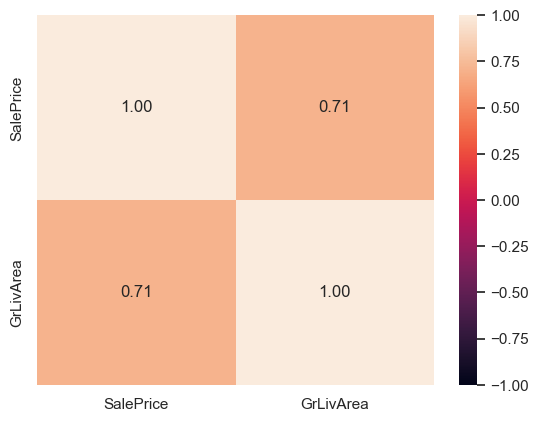

In [14]:
# Calculate the correlation between the two columns/variables
sb.heatmap(houseDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

b) Import Linear Regression model from Scikit-Learn : from sklearn.linear_model import LinearRegression

In [16]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Create a Linear Regression object
linreg = LinearRegression()         # create the linear regression object

c) Partition both datasets houseGrLivArea and houseSalePrice into Train (1100 rows) and Test (360 rows) sets.

Train datasets : houseGrLivArea_train and houseSalePrice_train (check both have 1100 rows)

Test datasets : houseGrLivArea_test and houseSalePrice_test (check both have 360 rows)


In [17]:
# Train Set : 1100 samples
#houseGrLivArea_train = pd.DataFrame(houseGrLivArea[:1100])
#houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])
# Test Set : 360 samples
#houseGrLivArea_test = pd.DataFrame(houseGrLivArea[-360:])
#houseSalePrice_test = pd.DataFrame(houseSalePrice[-360:])

# Split the Dataset into Train and Test
houseGrLivArea_train, houseGrLivArea_test, houseSalePrice_train, houseSalePrice_test = train_test_split(houseGrLivArea, houseSalePrice, test_size = 360/1460)

# Check the sample sizes
print("Train Set :", houseGrLivArea_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseGrLivArea_test.shape, houseSalePrice_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


d) Training : Fit a Linear Regression model with X = houseGrLivArea_train and y = houseSalePrice_train


In [18]:
# Train the Linear Regression model
linreg.fit(houseGrLivArea_train, houseSalePrice_train)

LinearRegression()

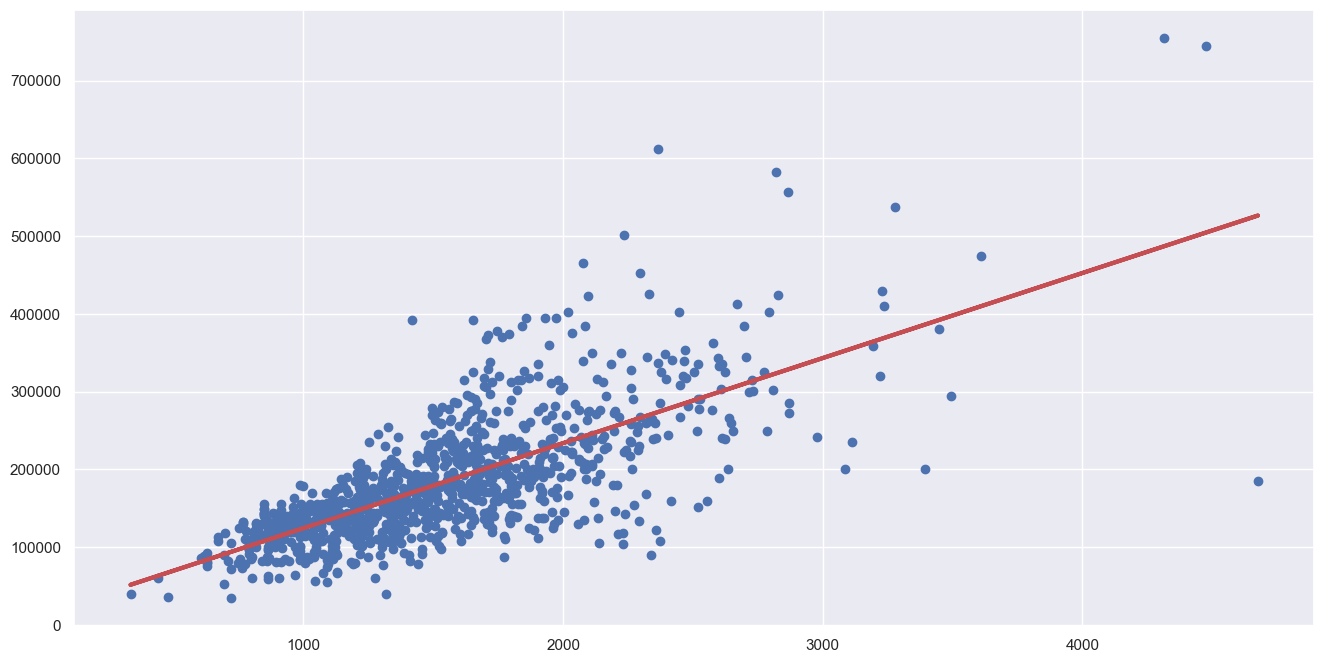

In [19]:
# Formula for the Regression line
regline_x = houseGrLivArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseGrLivArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()

e) Print the coefficients of the Linear Regression model you just fit, and plot the Regression line on a Scatterplot
of houseGrLivArea_train and houseSalePrice_train using the standard slope-intercept form of straight line.

In [20]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [15124.12000698]
Coefficients 	: a =  [[109.3487868]]


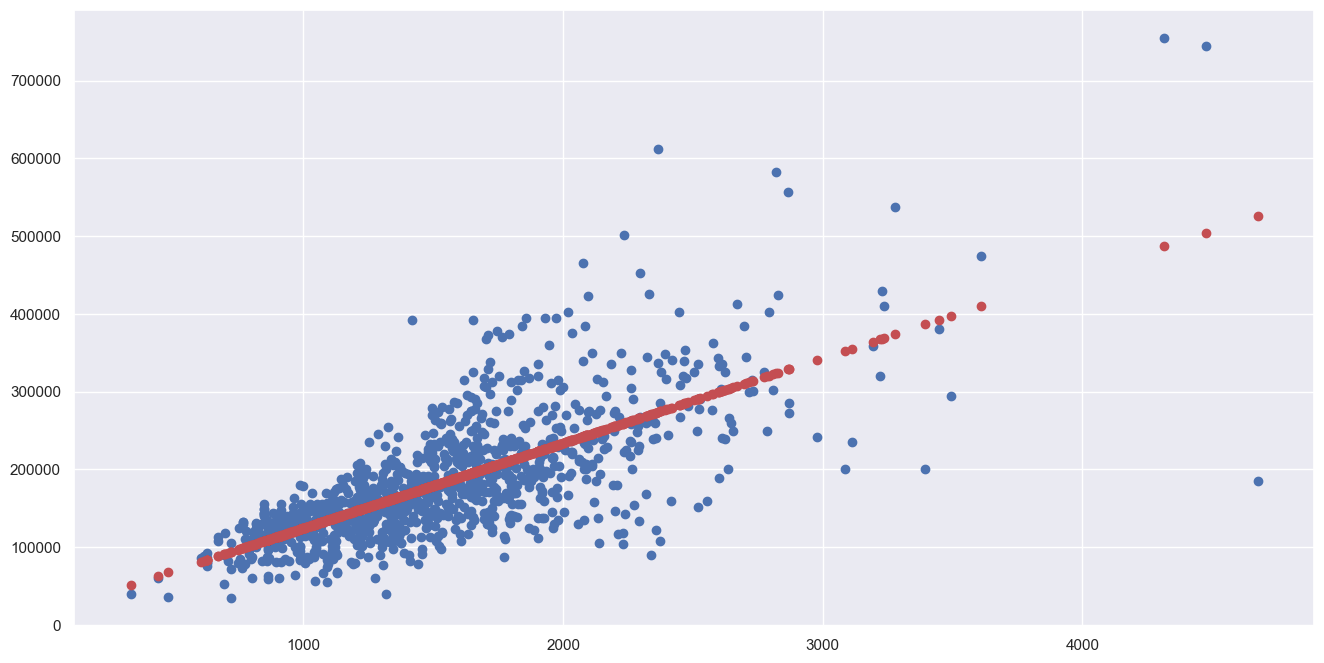

In [21]:
# Predict houseGrLivArea values corresponding to houseSalePrice Train
houseSalePrice_train_pred = linreg.predict(houseGrLivArea_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.scatter(houseGrLivArea_train, houseSalePrice_train_pred, color = "r")
plt.show()

f) Predict SalePrice for the test dataset houseGrLivArea_test using the Linear Regression model, and plot the
predictions on the Scatterplot of houseGrLivArea_test and houseSalePrice_test to visualize the accuracy.


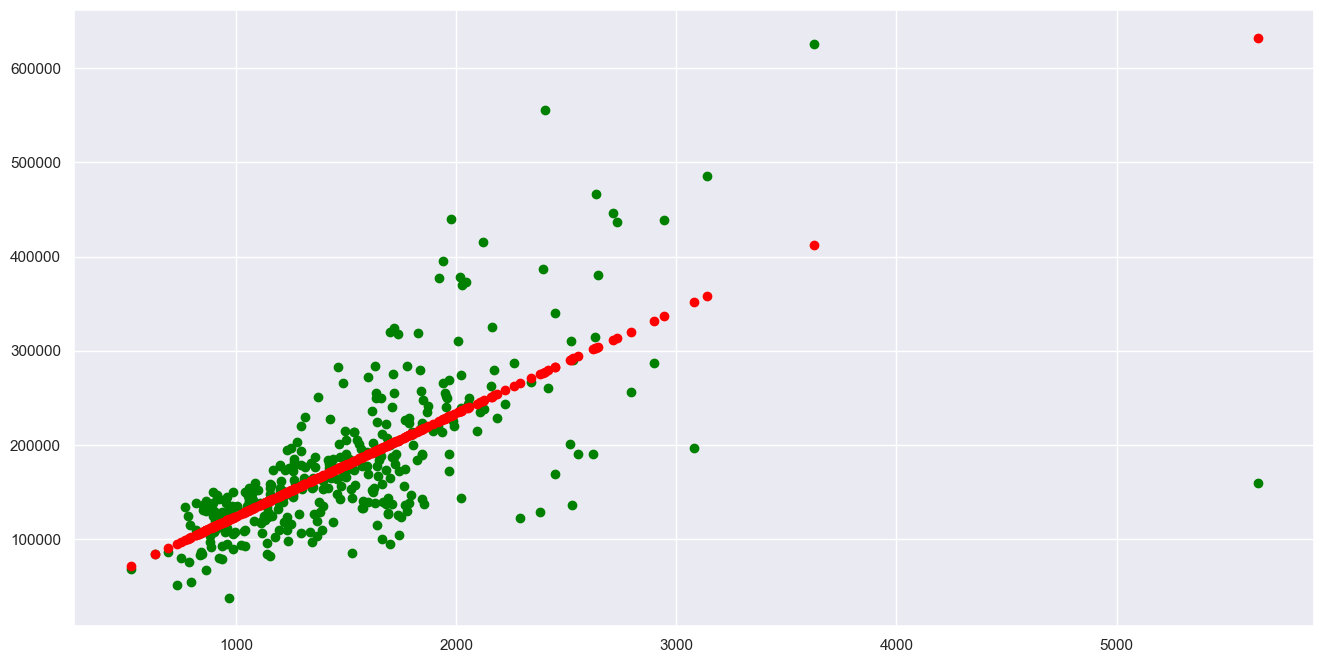

In [22]:
# Predict SalePrice corresponding to GrLivArea Test
houseSalePrice_test_pred = linreg.predict(houseGrLivArea_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(houseGrLivArea_test, houseSalePrice_test, color = "green")
plt.scatter(houseGrLivArea_test, houseSalePrice_test_pred, color = "red")
plt.show()

g) Find the Explained Variance (R^2) of the model on the Train set and on the Test set to check Goodness of Fit.

In [23]:
# Explained Variance (R^2)
print("Train Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_train, houseSalePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseSalePrice_train, houseSalePrice_train_pred)
print("Train Mean Squared Error (MSE) \t:", mse)
print("Train Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Train Explained Variance (R^2) 	: 0.5150710345011572
Train Mean Squared Error (MSE) 	: 3054848729.1163893
Train Root Mean Squared Error (RMSE) 	: 55270.68598376891


In [24]:
# Explained Variance (R^2)
print("Test Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_test, houseSalePrice_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseSalePrice_test, houseSalePrice_test_pred)
print("Test Mean Squared Error (MSE) \t:", mse)
print("Test Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Test Explained Variance (R^2) 	: 0.4607576291586214
Test Mean Squared Error (MSE) 	: 3405084002.300805
Test Root Mean Squared Error (RMSE) 	: 58353.097623869166


Problem 2 : Predicting SalePrice using Other Variables

Perform all the above steps on 'SalePrice' against each of the variables 'LotArea', 'TotalBsmtSF', 'GarageArea'
one-by-one to perform individual Linear Regressions. Discuss with your Friends about the models, compare and contrast
the Explained Variance (R^2), check the predictions, and determine which model is the best to predict 'SalePrice'.

(Model with Explained Variance (R^2) closer to 1 and RMSE/MSE closer to 0)

# 'SalePrice' against 'LotArea'

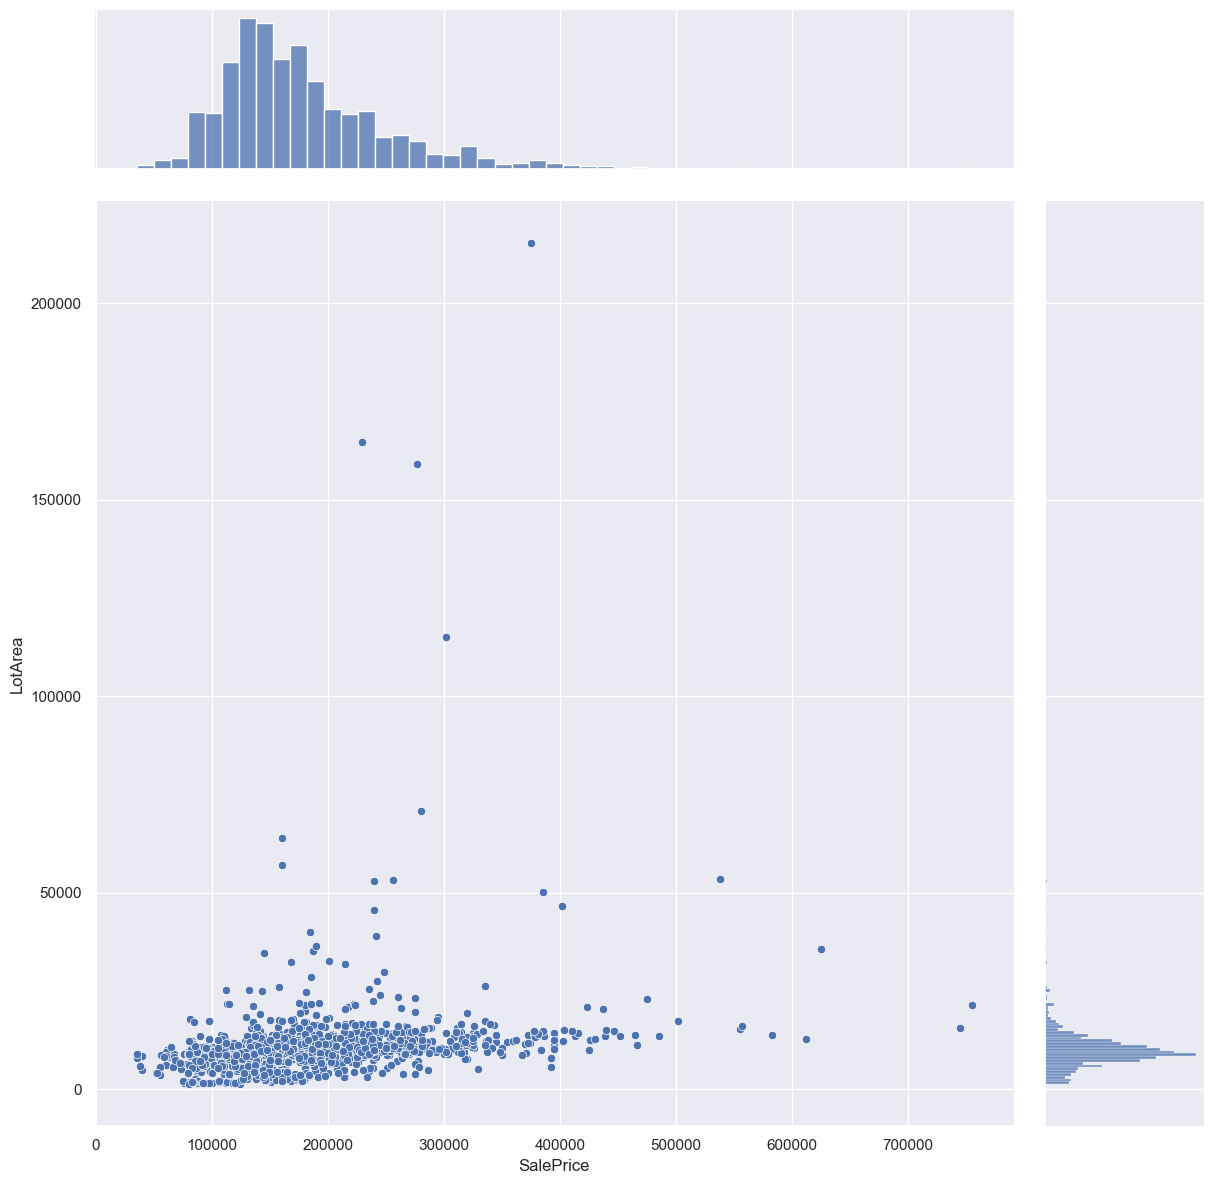

In [25]:
houseLotArea = pd.DataFrame(houseData['LotArea']) 
houseLotArea.head()

# Create a joint dataframe by concatenating the two variables
houseDF = pd.concat([houseSalePrice, houseLotArea], axis = 1).reindex(houseSalePrice.index)

# Jointplot of houseSalePrice against LotArea Train
sb.jointplot(data = houseDF, x = 'SalePrice' , y = 'LotArea', height = 12)


Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


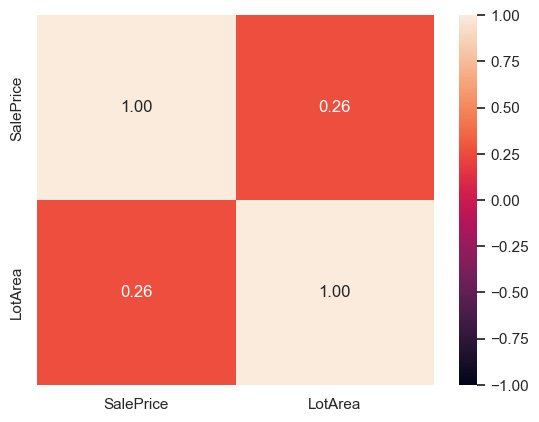

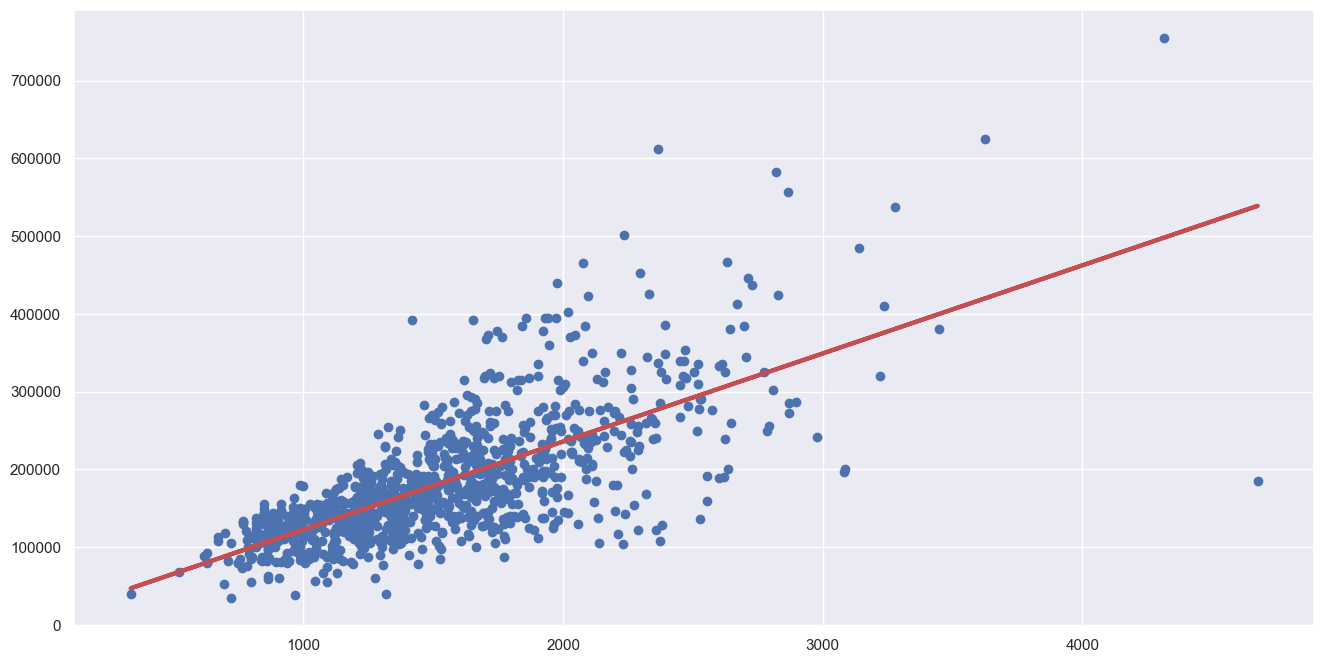

Intercept 	: b =  [9244.14016846]
Coefficients 	: a =  [[113.28656565]]


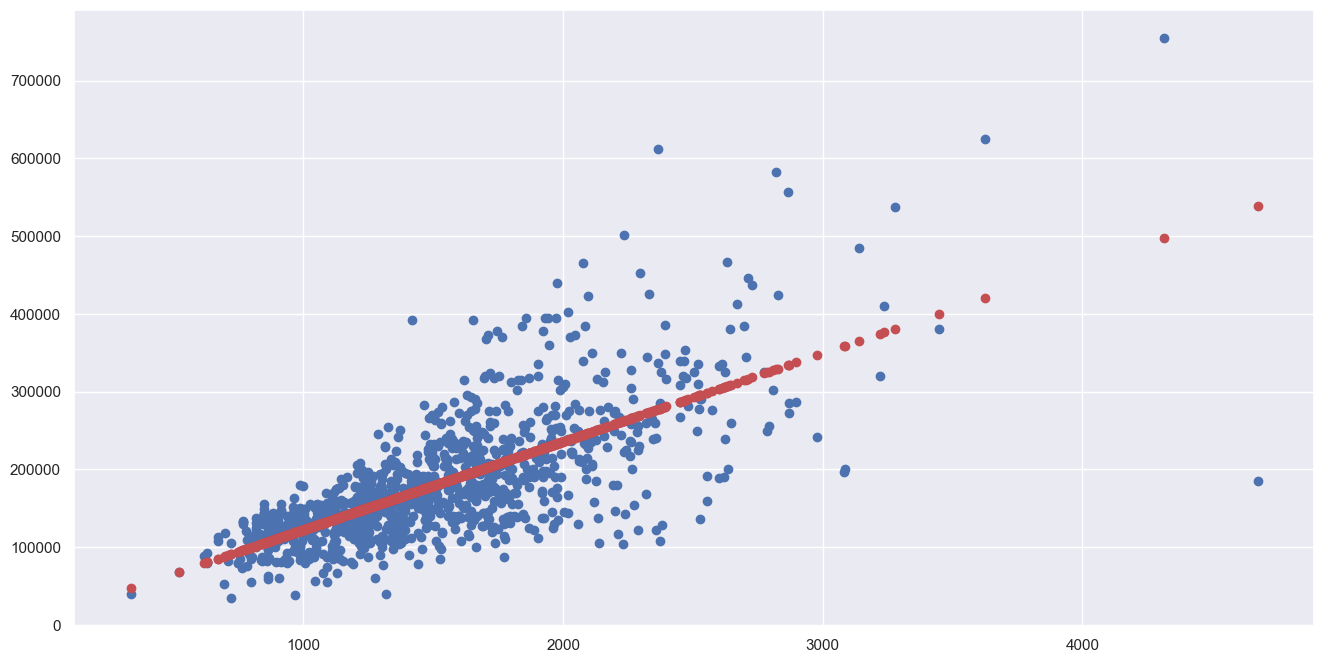

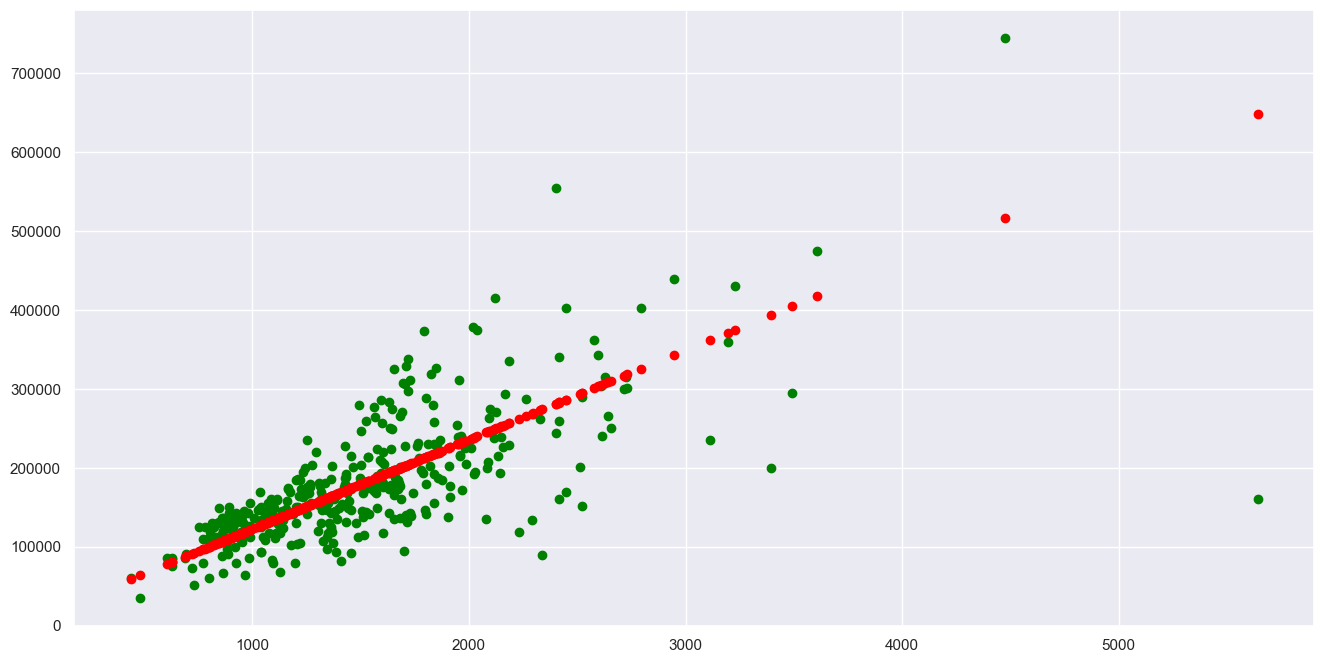

Train Explained Variance (R^2) 	: 0.510509321137943
Train Mean Squared Error (MSE) 	: 3053319729.228906
Train Root Mean Squared Error (RMSE) 	: 55256.85232827605
Test Explained Variance (R^2) 	: 0.4711883097399574
Test Mean Squared Error (MSE) 	: 3446632933.5038915
Test Root Mean Squared Error (RMSE) 	: 58708.031252154


In [26]:
# Calculate the correlation between the two columns/variables
sb.heatmap(houseDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

# Train Set : 1100 samples
#houseLotArea_train = pd.DataFrame(houseLotArea[:1100])
#houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])
# Test Set : 360 samples
#houseLotArea_test = pd.DataFrame(houseLotArea[-360:])
#houseSalePrice_test = pd.DataFrame(houseSalePrice[-360:])

# Split the Dataset into Train and Test
houseLotArea_train, houseLotArea_test, houseSalePrice_train, houseSalePrice_test = train_test_split(houseGrLivArea, houseSalePrice, test_size = 360/1460)

# Check the sample sizes
print("Train Set :", houseLotArea_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseLotArea_test.shape, houseSalePrice_test.shape)


# Train the Linear Regression model
linreg.fit(houseLotArea_train, houseSalePrice_train)


# Formula for the Regression line
regline_x = houseLotArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseLotArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(houseLotArea_train, houseSalePrice_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()


# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)


# Predict Total values corresponding to HP Train
houseSalePrice_train_pred = linreg.predict(houseLotArea_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(houseLotArea_train, houseSalePrice_train)
plt.scatter(houseLotArea_train, houseSalePrice_train_pred, color = "r")
plt.show()


# Predict SalePrice corresponding to LotArea Test
houseSalePrice_test_pred = linreg.predict(houseLotArea_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(houseLotArea_test, houseSalePrice_test, color = "green")
plt.scatter(houseLotArea_test, houseSalePrice_test_pred, color = "red")
plt.show()


# Explained Variance (R^2)
print("Train Explained Variance (R^2) \t:", linreg.score(houseLotArea_train, houseSalePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseSalePrice_train, houseSalePrice_train_pred)
print("Train Mean Squared Error (MSE) \t:", mse)
print("Train Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))


# Explained Variance (R^2)
print("Test Explained Variance (R^2) \t:", linreg.score(houseLotArea_test, houseSalePrice_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseSalePrice_test, houseSalePrice_test_pred)
print("Test Mean Squared Error (MSE) \t:", mse)
print("Test Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

#  'SalePrice' against 'TotalBsmtSF'

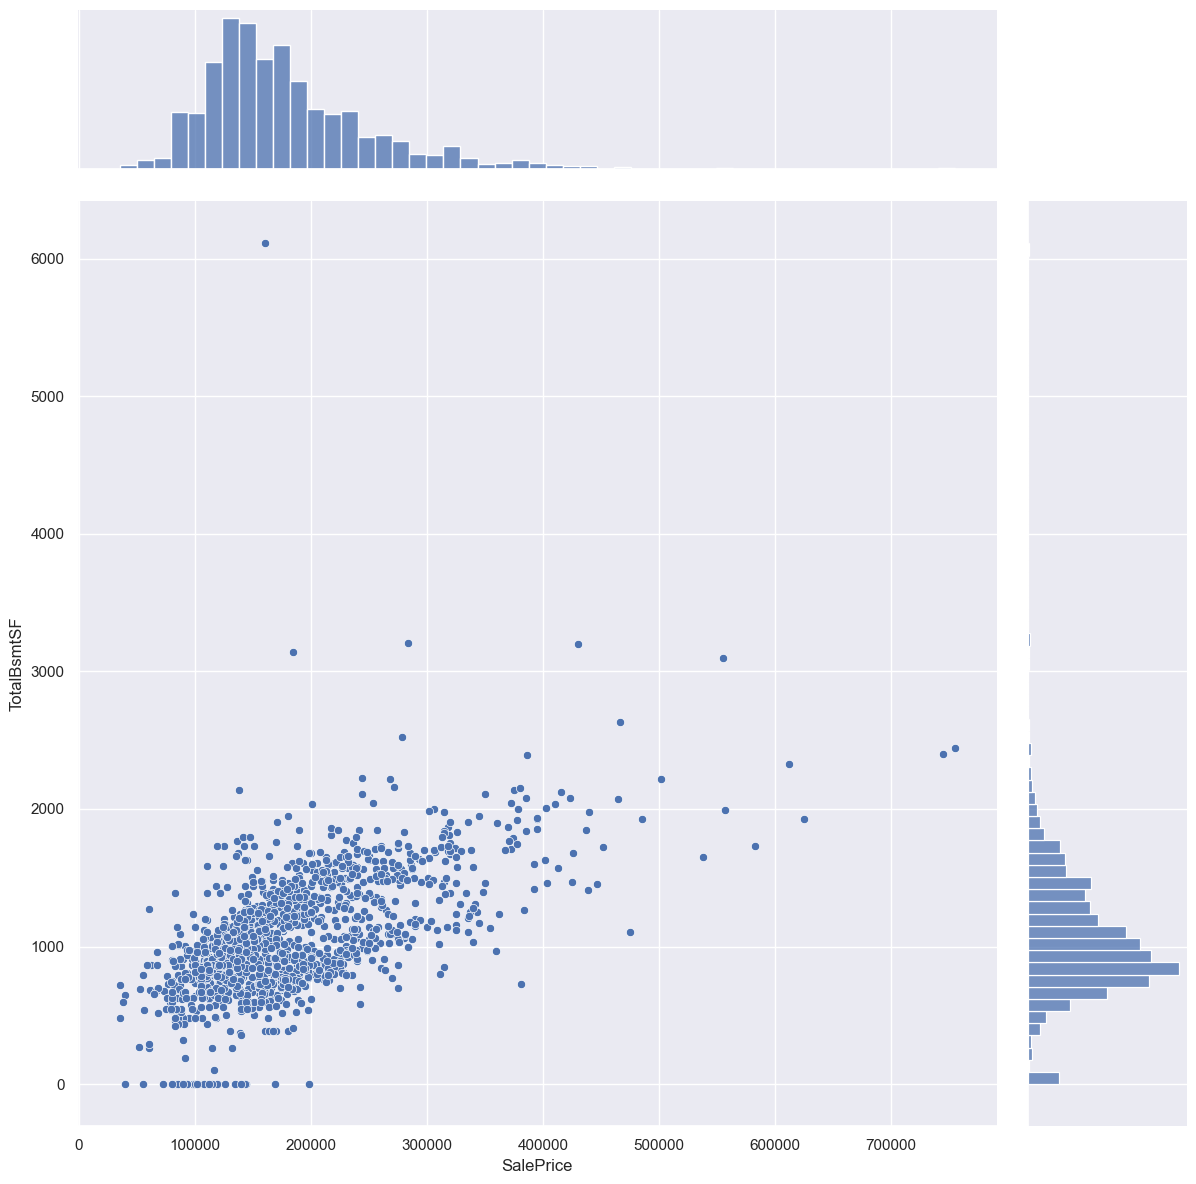

In [27]:
houseTotalBsmtSF = pd.DataFrame(houseData['TotalBsmtSF']) 
houseTotalBsmtSF.head()

# Create a joint dataframe by concatenating the two variables
houseDF = pd.concat([houseSalePrice, houseTotalBsmtSF], axis = 1).reindex(houseSalePrice.index)

# Jointplot of houseSalePrice against TotalBsmtSF Train
sb.jointplot(data = houseDF, x = 'SalePrice' , y = 'TotalBsmtSF', height = 12)


Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


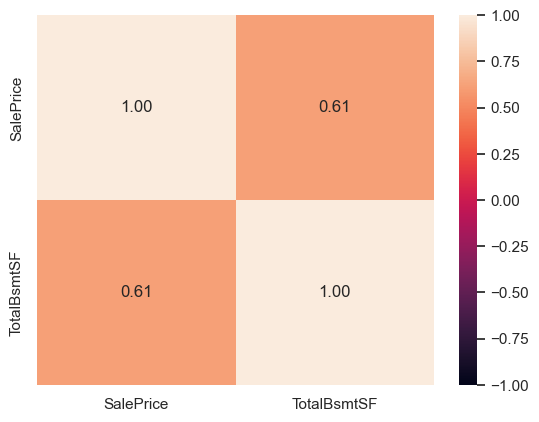

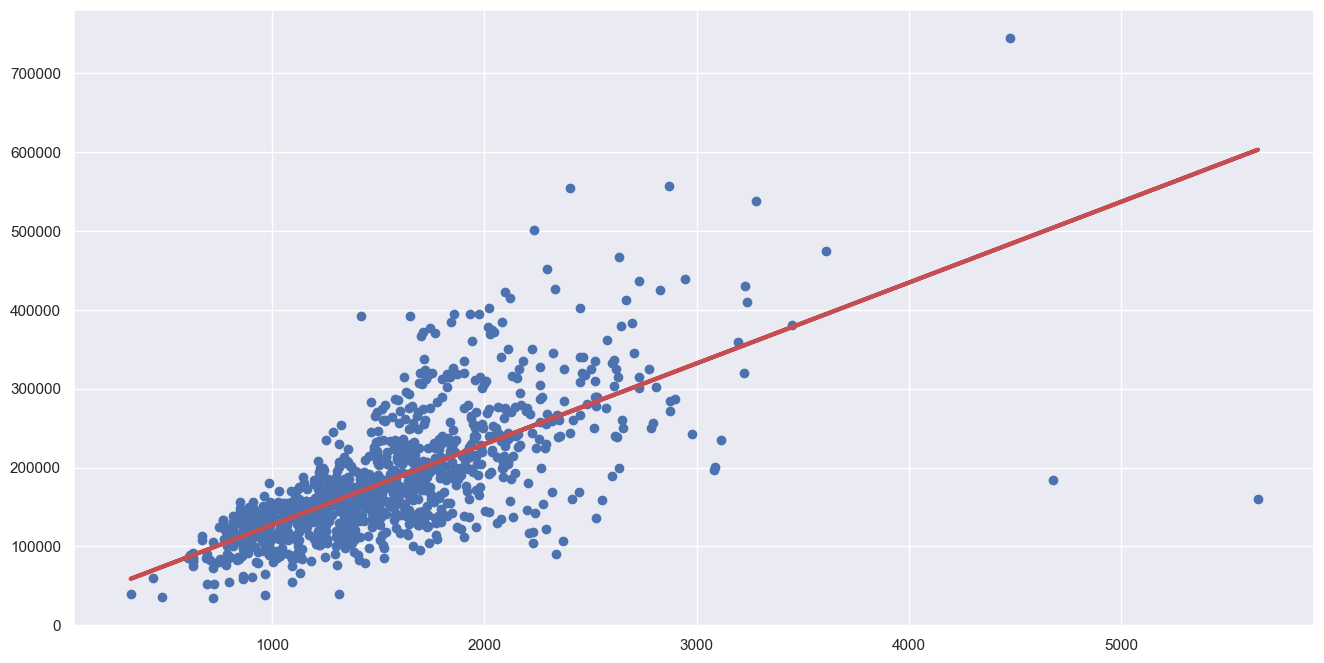

Intercept 	: b =  [24681.66405629]
Coefficients 	: a =  [[102.51347326]]


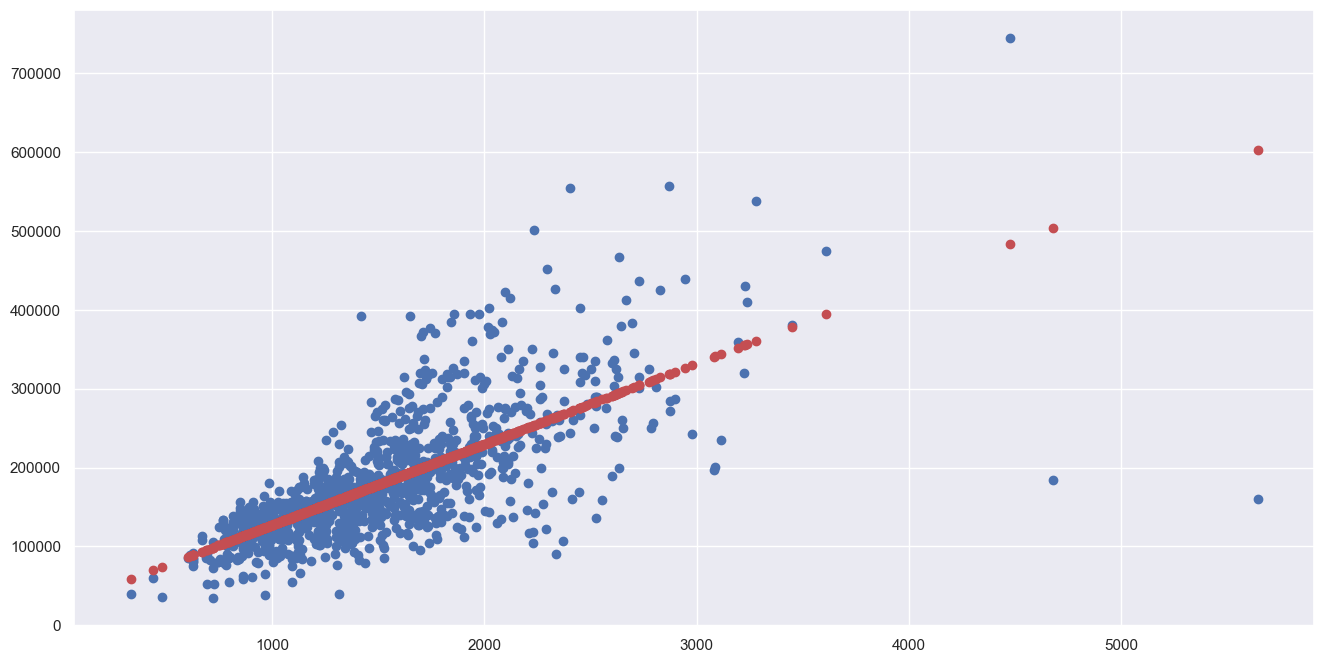

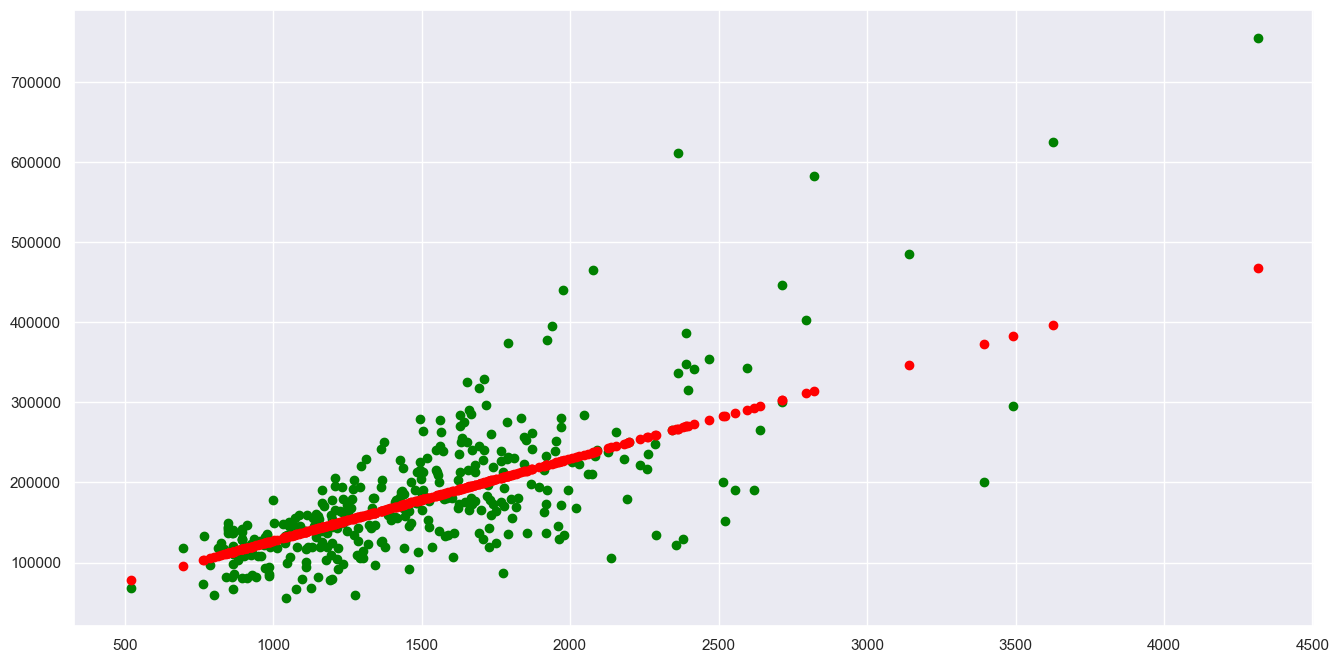

Train Explained Variance (R^2) 	: 0.49527184719298534
Train Mean Squared Error (MSE) 	: 3000512858.9259224
Train Root Mean Squared Error (RMSE) 	: 54776.93729048679
Test Explained Variance (R^2) 	: 0.51532839005147
Test Mean Squared Error (MSE) 	: 3592598836.9338074
Test Root Mean Squared Error (RMSE) 	: 59938.29190871064


In [28]:
# Calculate the correlation between the two columns/variables
sb.heatmap(houseDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

# Train Set : 1100 samples
#houseTotalBsmtSF_train = pd.DataFrame(houseTotalBsmtSF[:1100])
#houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])
# Test Set : 360 samples
#houseTotalBsmtSF_test = pd.DataFrame(houseTotalBsmtSF[-360:])
#houseSalePrice_test = pd.DataFrame(houseSalePrice[-360:])

# Split the Dataset into Train and Test
houseTotalBsmtSF_train, houseTotalBsmtSF_test, houseSalePrice_train, houseSalePrice_test = train_test_split(houseGrLivArea, houseSalePrice, test_size = 360/1460)


# Check the sample sizes
print("Train Set :", houseTotalBsmtSF_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseTotalBsmtSF_test.shape, houseSalePrice_test.shape)


# Train the Linear Regression model
linreg.fit(houseTotalBsmtSF_train, houseSalePrice_train)


# Formula for the Regression line
regline_x = houseTotalBsmtSF_train
regline_y = linreg.intercept_ + linreg.coef_ * houseTotalBsmtSF_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(houseTotalBsmtSF_train, houseSalePrice_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()


# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)


# Predict Total values corresponding to HP Train
houseSalePrice_train_pred = linreg.predict(houseTotalBsmtSF_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(houseTotalBsmtSF_train, houseSalePrice_train)
plt.scatter(houseTotalBsmtSF_train, houseSalePrice_train_pred, color = "r")
plt.show()


# Predict SalePrice corresponding to TotalBsmtSF Test
houseSalePrice_test_pred = linreg.predict(houseTotalBsmtSF_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(houseTotalBsmtSF_test, houseSalePrice_test, color = "green")
plt.scatter(houseTotalBsmtSF_test, houseSalePrice_test_pred, color = "red")
plt.show()


# Explained Variance (R^2)
print("Train Explained Variance (R^2) \t:", linreg.score(houseTotalBsmtSF_train, houseSalePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseSalePrice_train, houseSalePrice_train_pred)
print("Train Mean Squared Error (MSE) \t:", mse)
print("Train Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))


# Explained Variance (R^2)
print("Test Explained Variance (R^2) \t:", linreg.score(houseTotalBsmtSF_test, houseSalePrice_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseSalePrice_test, houseSalePrice_test_pred)
print("Test Mean Squared Error (MSE) \t:", mse)
print("Test Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

# 'SalePrice' against 'GarageArea'

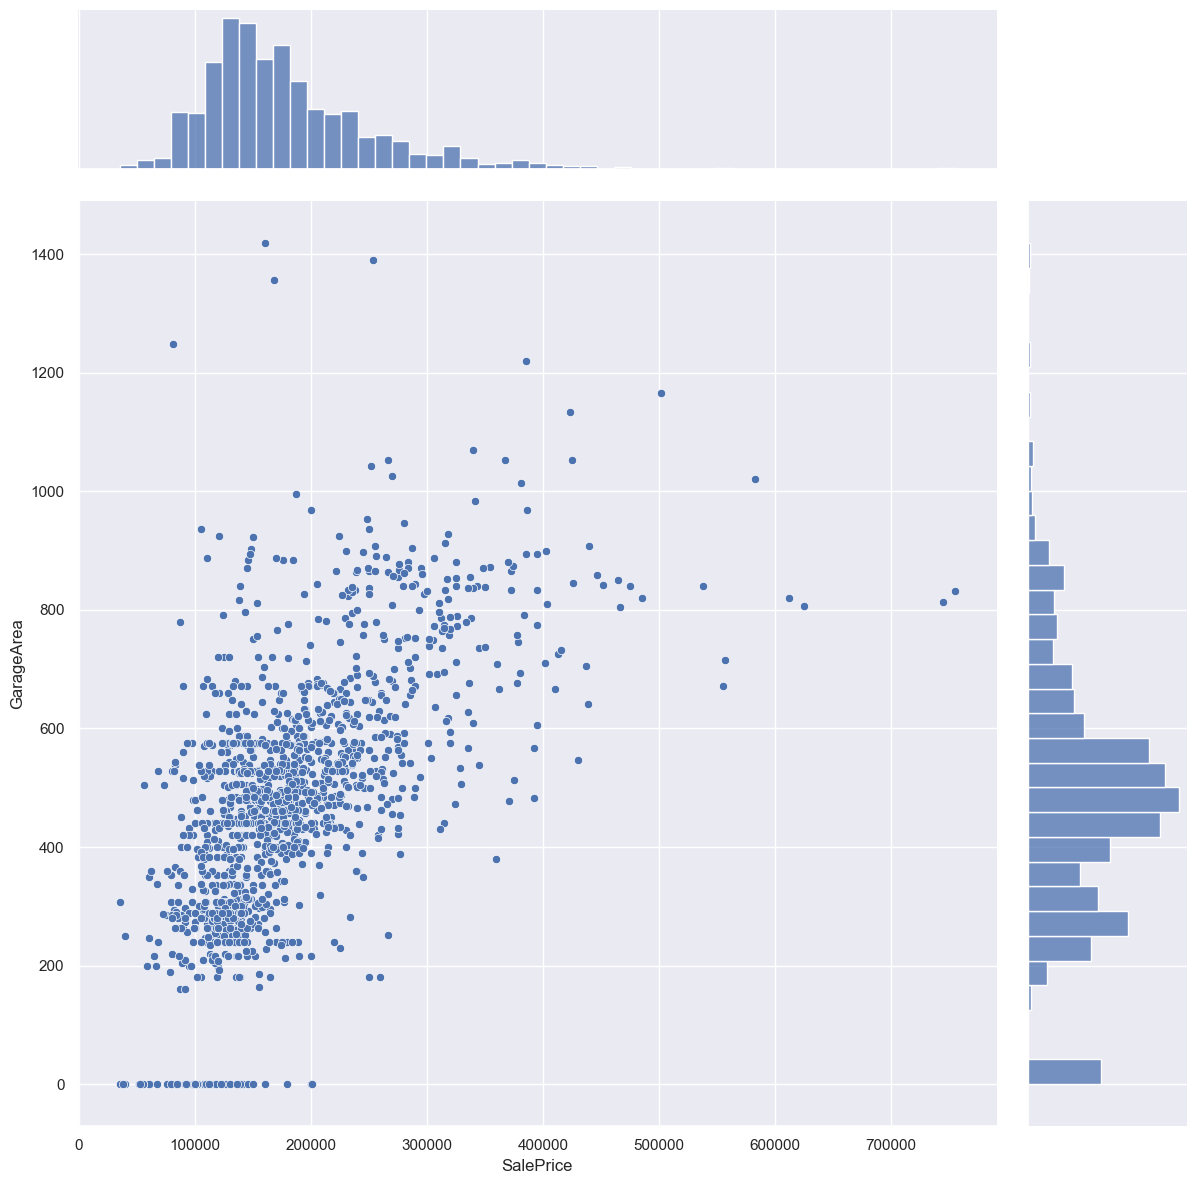

In [29]:
houseGarageArea = pd.DataFrame(houseData['GarageArea']) 
houseGarageArea.head()

# Create a joint dataframe by concatenating the two variables
houseDF = pd.concat([houseSalePrice, houseGarageArea], axis = 1).reindex(houseSalePrice.index)

# Jointplot of houseSalePrice against GarageArea Train
sb.jointplot(data = houseDF, x = 'SalePrice' , y = 'GarageArea', height = 12)


Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


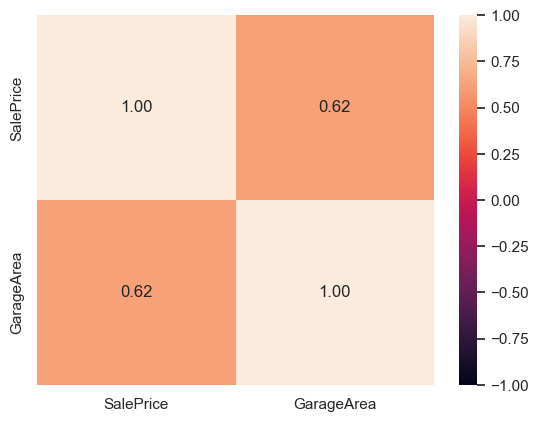

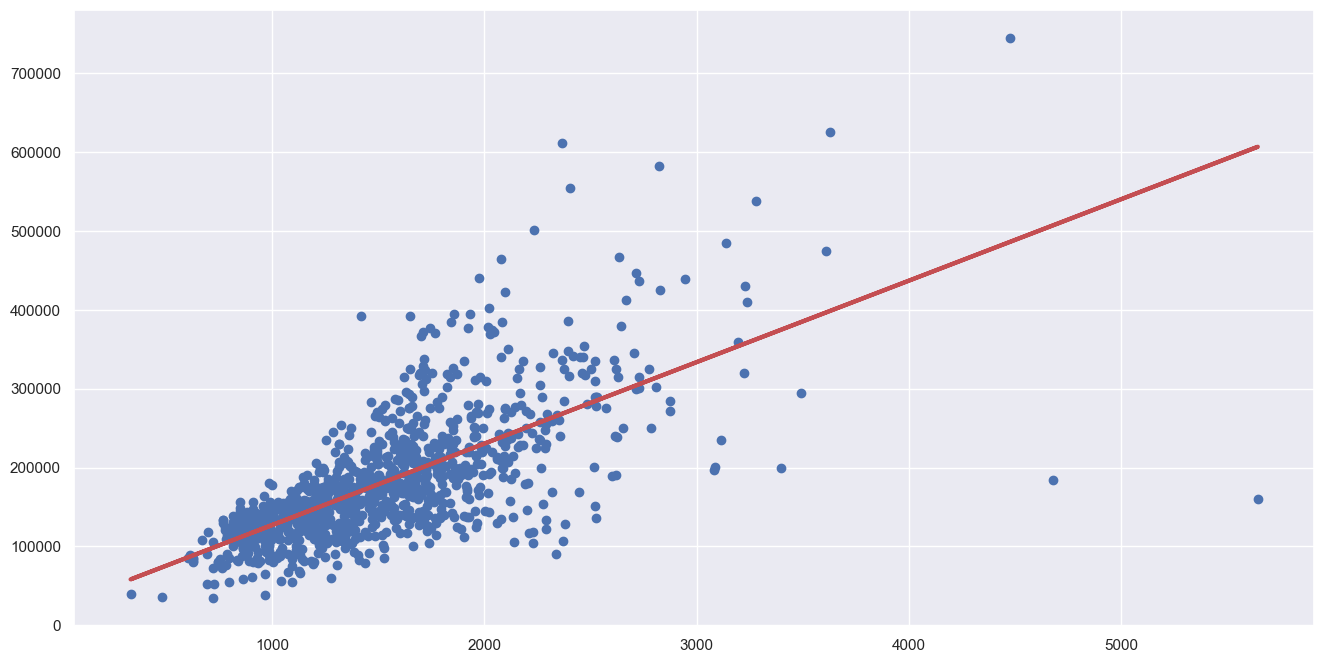

Intercept 	: b =  [23742.21819011]
Coefficients 	: a =  [[103.35330079]]


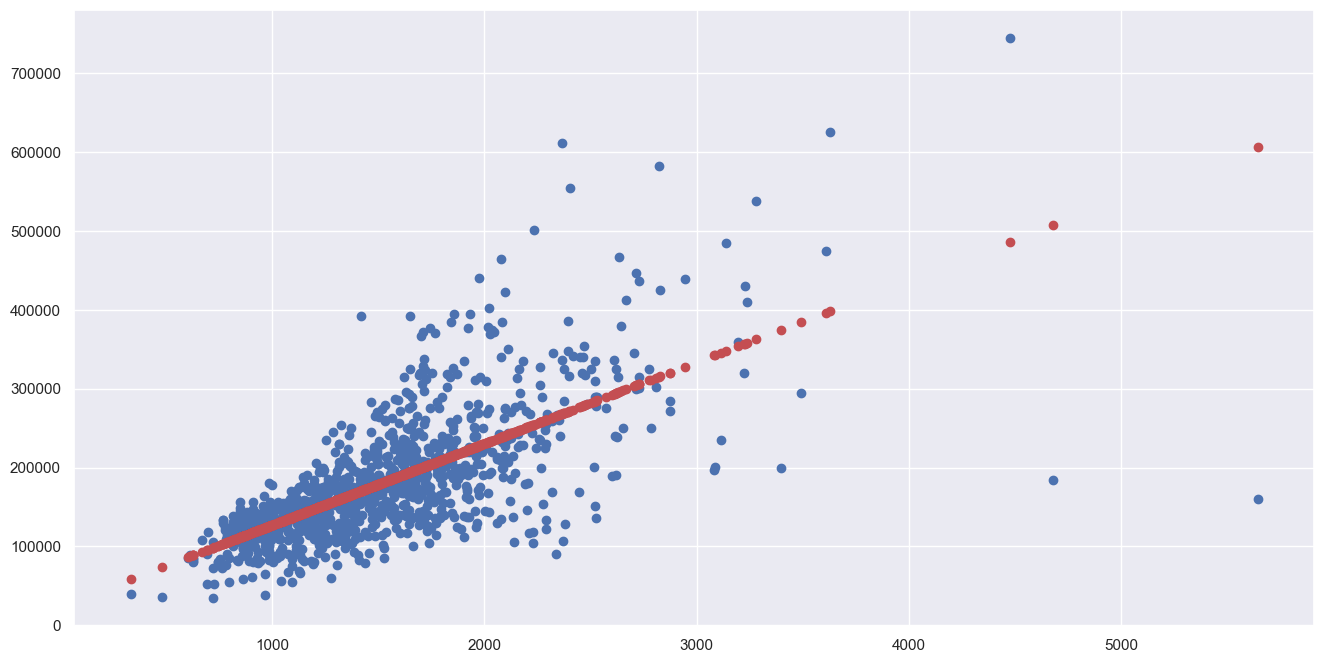

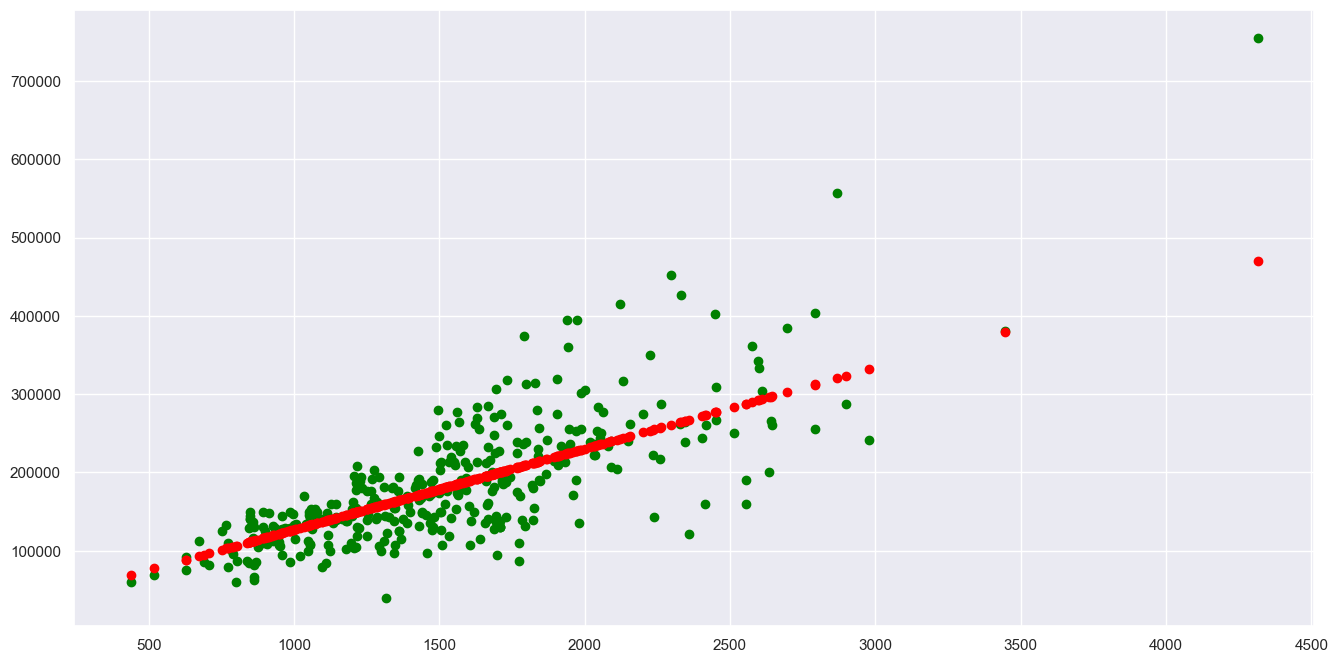

Train Explained Variance (R^2) 	: 0.4769773146597065
Train Mean Squared Error (MSE) 	: 3280223612.9432864
Train Root Mean Squared Error (RMSE) 	: 57273.23644550992
Test Explained Variance (R^2) 	: 0.5740817237256453
Test Mean Squared Error (MSE) 	: 2728098631.109705
Test Root Mean Squared Error (RMSE) 	: 52231.20361536487


In [32]:
# Calculate the correlation between the two columns/variables
sb.heatmap(houseDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")


# Train Set : 1100 samples
#houseGarageArea_train = pd.DataFrame(houseGarageArea[:1100])
#houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])
# Test Set : 360 samples
#houseGarageArea_test = pd.DataFrame(houseGarageArea[-360:])
#houseSalePrice_test = pd.DataFrame(houseSalePrice[-360:])


# Split the Dataset into Train and Test
houseGarageArea_train, houseGarageArea_test, houseSalePrice_train, houseSalePrice_test = train_test_split(houseGrLivArea, houseSalePrice, test_size = 360/1460)


# Check the sample sizes
print("Train Set :", houseGarageArea_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseGarageArea_test.shape, houseSalePrice_test.shape)


# Train the Linear Regression model
linreg.fit(houseGarageArea_train, houseSalePrice_train)


# Formula for the Regression line
regline_x = houseGarageArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseGarageArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(houseGarageArea_train, houseSalePrice_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()


# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)


# Predict houseGarageArea values corresponding to houseGarageArea Train
houseSalePrice_train_pred = linreg.predict(houseGarageArea_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(houseGarageArea_train, houseSalePrice_train)
plt.scatter(houseGarageArea_train, houseSalePrice_train_pred, color = "r")
plt.show()


# Predict SalePrice corresponding to GarageArea Test
houseSalePrice_test_pred = linreg.predict(houseGarageArea_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(houseGarageArea_test, houseSalePrice_test, color = "green")
plt.scatter(houseGarageArea_test, houseSalePrice_test_pred, color = "red")
plt.show()


# Explained Variance (R^2)
print("Train Explained Variance (R^2) \t:", linreg.score(houseGarageArea_train, houseSalePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseSalePrice_train, houseSalePrice_train_pred)
print("Train Mean Squared Error (MSE) \t:", mse)
print("Train Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))


# Explained Variance (R^2)
print("Test Explained Variance (R^2) \t:", linreg.score(houseGarageArea_test, houseSalePrice_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseSalePrice_test, houseSalePrice_test_pred)
print("Test Mean Squared Error (MSE) \t:", mse)
print("Test Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))